In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import pickle as pkl
import sklearn as skl
import sys
sys.path.append('../0_python_modules/')
import extras
import navjeet_hist as nh
import metrics as mtr

In [2]:
tlags=np.array([10, 20, 30, 50, 70, 100, 150, 200, 250, 350, 500, 700, 1000, 1500, 2000])
exps_sa = 2.837

weights = np.loadtxt('../1_datasets/SIC1/rg_ca.xvg', comments=['@','#'])[:,1]
weights = np.where(weights > exps_sa)[0].shape[0]/weights.shape[0]
weights

0.1614672351295006

In [3]:
randoms = np.loadtxt('../1_datasets/randoms.txt', dtype=int)

In [4]:
hdirect = np.load('saved_direct/tlags.npy')

hsupervised = [np.load(f'saved_supervised/hist_{i}.npy') for i in range(5)]
esupervised = [np.load(f'saved_supervised/extents_{i}.npy') for i in range(5)]

hpermute = np.load('saved_furf/ftry.npy')[:,:,0,:,:]

In [5]:
impures = np.arange(0.01, 1, 0.01)

tl=0


cdirect = [ nh.classification_extent( hdirect[tl], cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weights, jm_impure=i)
           for i in impures]

csupervised = [
    [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weights, jm_impure=i)
    for i in impures]
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0)

cpermute = [
    [
        [
            nh.classification_extent( hpermute[h-2][r][tl], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weights, jm_impure=i)
        for i in impures]
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1)

In [6]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_3076034/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


0.26


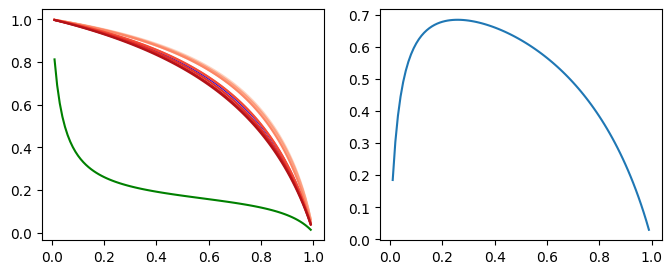

In [7]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].plot(impures, cdirect,  c='g', )
ax[0].plot(impures, csupervised, c='b',)
for i in range(9): ax[0].plot(impures, cpermute[i], c=cmaps((i+2)/12))
ax[1].plot(impures, csupervised-cdirect)
print(impures[np.argmax(csupervised-cdirect)])

In [8]:
jm_impure=0.26

In [9]:
cdirect = nh.classification_extent( hdirect[tl], cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weights, jm_impure=jm_impure)

csupervised = [
        nh.classification_extent( hsupervised[r], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weights, jm_impure=jm_impure)
for r in range(len(randoms))]
csupervised = np.mean(csupervised, axis=0), np.std(csupervised, axis=0)

cpermute = [
        [
            nh.classification_extent( hpermute[h-2][r][tl], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weights, jm_impure=jm_impure)
    for r in range(len(randoms))]
for h in range(2,11)]
cpermute = np.mean(cpermute, axis=1), np.std(cpermute, axis=1)

In [10]:
lc = np.load('saved_furf/lc1.npy')
lc = np.mean(lc, axis=1), np.std(lc, axis=1)

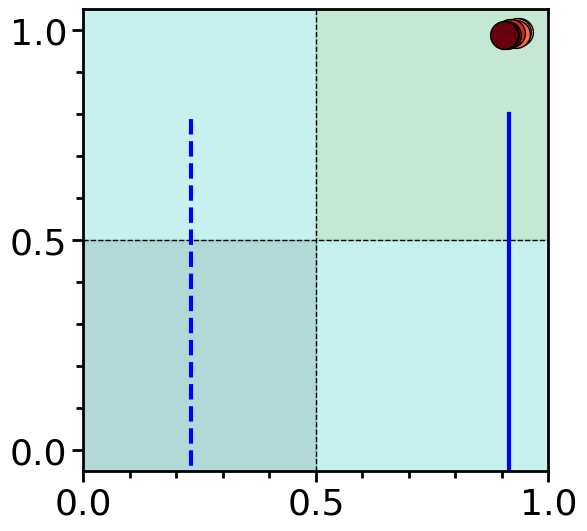

In [11]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(-0.05,1.05)
ax.axvline(0.5,c='black',lw=1, ls='--')
ax.axhline(0.5,c='black',lw=1, ls='--')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
#
ax.fill_between([-0.05,0.5],[-0.05,-0.05],[0.5,0.5],color='teal', alpha=0.3)
ax.fill_between([-0.05,0.5],[1.05,1.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[-0.05,-0.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[1.05,1.05],[0.5,0.5],color='mediumseagreen', alpha=0.3)
#
ax.plot([cdirect, cdirect], [-0.5,0.8], '--', lw=3, c='b')
ax.errorbar([csupervised[0], csupervised[0]], [-0.5,0.8], xerr=[csupervised[1], csupervised[1]], lw=3, c='b')
for a in range(9):
    ax.errorbar([cpermute[0][a]], [lc[0][a]], 
                xerr=[cpermute[1][a]], yerr=[lc[1][a]],
                fmt='o', c=cmaps((a+2)/10), ms=20, mec='black')
#
plt.savefig('plots/lc.pdf')
plt.show()

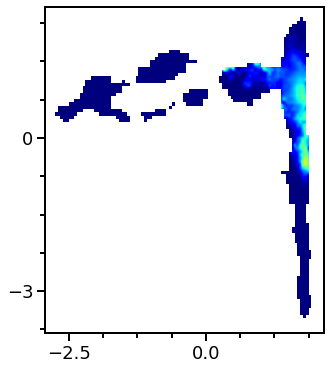

In [15]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
tl=0
ax.imshow(hdirect[tl].T, 
          aspect='auto', extent=esupervised[0], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/direct.pdf')
plt.show()

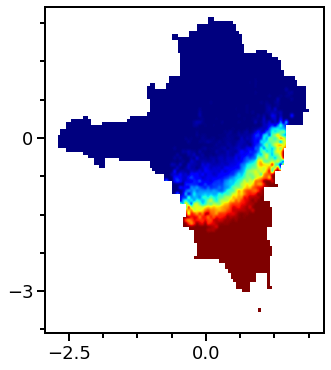

In [16]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
i=0
ax.imshow(hsupervised[i].T, 
          aspect='auto', extent=esupervised[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/supervised{i}.pdf')
plt.show()

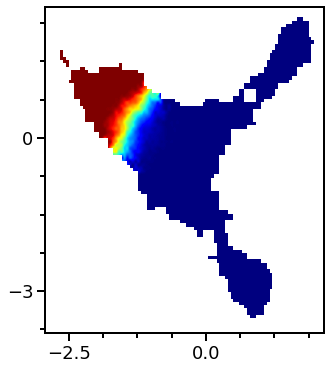

In [17]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
h,i,tl=2,0,0
ax.imshow(hpermute[h-2][i][tl].T, 
          aspect='auto', extent=esupervised[i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/urf_{h}_{i}.pdf')
plt.show()

In [37]:
tcdirect = [nh.classification_extent( i, cutoff=0.1, strategy='weighted', 
                                  output_type='jm', operation=2, jm_lower=weights, jm_impure=jm_impure)
           for i in hdirect]


tcpermute = [
        [
            [
                
            nh.classification_extent( hpermute[h-2][r][tl], cutoff=0.1, strategy='weighted', 
                                output_type='jm', operation=2, jm_lower=weights, jm_impure=jm_impure)
            for tl in range(len(tlags))]
    for r in range(len(randoms))]
for h in range(2,11)]
tcpermute = np.mean(tcpermute, axis=1), np.std(tcpermute, axis=1)
tcpermute[1][np.isnan(tcpermute[1])] = 0

/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


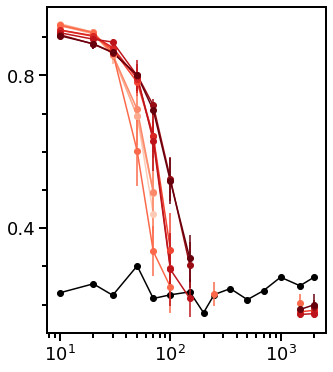

In [78]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.set_xscale('log')
ax.plot(tlags, tcdirect, '-o', c='black')
for h in range(2,11): 
    ax.plot(tlags, tcpermute[0][h-2], c=cmaps(h/10))
    valid = ~np.isnan(tcpermute[0][h-2])
    ax.errorbar(tlags[valid], tcpermute[0][h-2][valid], yerr=tcpermute[1][h-2][valid], fmt='o',  c=cmaps(h/10))
# 
plt.savefig(f'plots/tlags.pdf')
plt.show()

In [56]:
fsupervised = [np.load(f'saved_supervised/fimp_supervised{i}.npy') for i in range(5)]
fsupervised = [np.cumsum(i[i.argsort()[::-1]]) for i in fsupervised]
fsupervised = np.mean(fsupervised, axis=0), np.std(fsupervised, axis=0)

fpermute = [
    [
        np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]
fpermute = [[np.cumsum(j[j.argsort()[::-1]]) for j in i] for i in fpermute]
fpermute = np.mean(fpermute, axis=1), np.std(fpermute, axis=1)

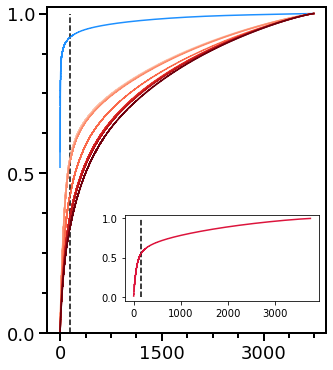

In [87]:
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(3))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,1.02)
ax.set_yticks([0,0.5,1])
#
ax.errorbar(range(len(fsupervised[0])), fsupervised[0], yerr=fsupervised[1], c='dodgerblue')
for h in range(2,11): ax.errorbar(range(fsupervised[0].shape[0]), fpermute[0][h-2], yerr=fpermute[1][h-2],
                                  c=cmaps(h/10))
ax.plot([150,150],[0,1], '--', c='black')
cax = fig.add_axes([0.34,0.2,0.54,0.2])
cax.errorbar(range(fsupervised[0].shape[0]), fpermute[0][1], yerr=fpermute[1][1],
            c='crimson')
cax.plot([150,150],[0,1], '--', c='black')
#
plt.savefig(f'plots/fimp.pdf')
plt.show()

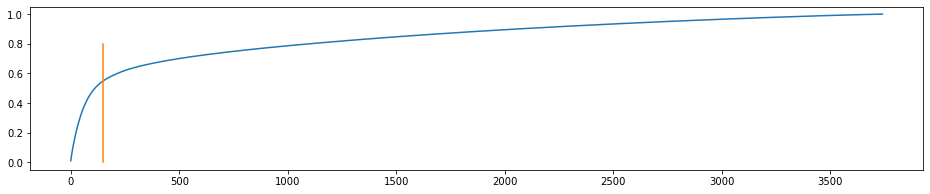

In [85]:
plt.figure(figsize=(16,3))
plt.plot(fpermute[0][0])
plt.plot([150,150],[0,0.8])
# plt.xlim(0,500)